In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import PowerNorm
import numpy as np

In [87]:
ls ../

README.md                  out_test_MGYG000000196/
Snakefile                  phasefinder_akk_H4024.csv
check_ratio.py             scripts/
combined_with_SRR_all.csv  slurm.sh
jupyter_notebook/          test.sh
metadata/


In [206]:
phase_df = pd.read_csv("../phasefinder_akk_H4024.csv")

In [149]:
phase_df.shape

(243364, 9)

In [150]:
len(phase_df['ID'].unique())

11062

In [207]:
antibiotic_samples = ['SRR5936212', 'SRR5936126']  
phase_df['Antibiotic'] = phase_df['sample_id'].isin(antibiotic_samples)

In [208]:
#Pe_ratio is NaN could be 
#1. there is not enough coverage in the sequencing data
#2. this inverton does not exist in the sample
# for both situations, we would not be able to know the actaul ratio
#--> remove the NaN ones in Pe_ratio
phase_df = phase_df.dropna(subset=['Pe_ratio'])
phase_df.shape # 243364-26874 = 216490 #216490/243364= 88.9%

(26874, 10)

In [209]:
len(phase_df['ID'].unique()) #3932/11062 = 35.5%

3932

In [98]:
#phase_df['Pe_ratio'] = 0 means the inverton is all in forward orientation
#phase_df['Pe_ratio'] = 1 means the inverton is all in reverse orientation

In [234]:
#MGYG000002454
species_to_plot = 'MGYG000002454' #Akkermansia muciniphila
df_plot = phase_df[phase_df['species_id']==species_to_plot]
df_plot.shape

(9628, 10)

In [211]:
len(df_plot['ID'].unique())

1152

In [192]:
#SRR5936126
#df_plot[df_plot['sample_id']=='SRR5936212']['Pe_ratio'].tolist()

In [212]:
sample_order = [
    "SRR5962882",
    "SRR5936159",
    "SRR5947045",
    "SRR5946748",
    "SRR5936212", #antibio
    "SRR5936126", #antibio
    "SRR5947041",
    "SRR5946612",
    "SRR5946609",
    "SRR5946947",
    "SRR5946644",
    "SRR5950740",
    "SRR5950718",
    "SRR5935745",
    "SRR5950500",
    "SRR5950592",
    "SRR5950528",
    "SRR5950717",
    "SRR5935772",
    "SRR5950649",
    "SRR5950729",
    "SRR5946857"
]

In [213]:
# Samples under antibiotics
antibiotic_samples = ["SRR5936212", "SRR5936126"]

In [215]:
# Pivot to have IDs as rows, sample_id as columns
heatmap_data = df_plot.pivot(index='ID', columns='sample_id', values='Pe_ratio')

# Keep only IDs that exist in all samples (no missing values)
heatmap_data_filtered = heatmap_data.dropna(how='any')

heatmap_data.shape

(1152, 20)

In [202]:
# # Count number of unique sample_id per ID
# counts = df_plot.groupby('ID')['sample_id'].nunique()

# # Keep IDs that appear in all samples
# all_sample_count = df_plot['sample_id'].nunique()
# ids_in_all_samples = counts[counts == all_sample_count].index

# # Filter the DataFrame
# df_filtered = df_plot[df_plot['ID'].isin(ids_in_all_samples)]

# df_filtered['ID'].unique()


/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_6515/35600470.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color='white', edgecolor='white'))


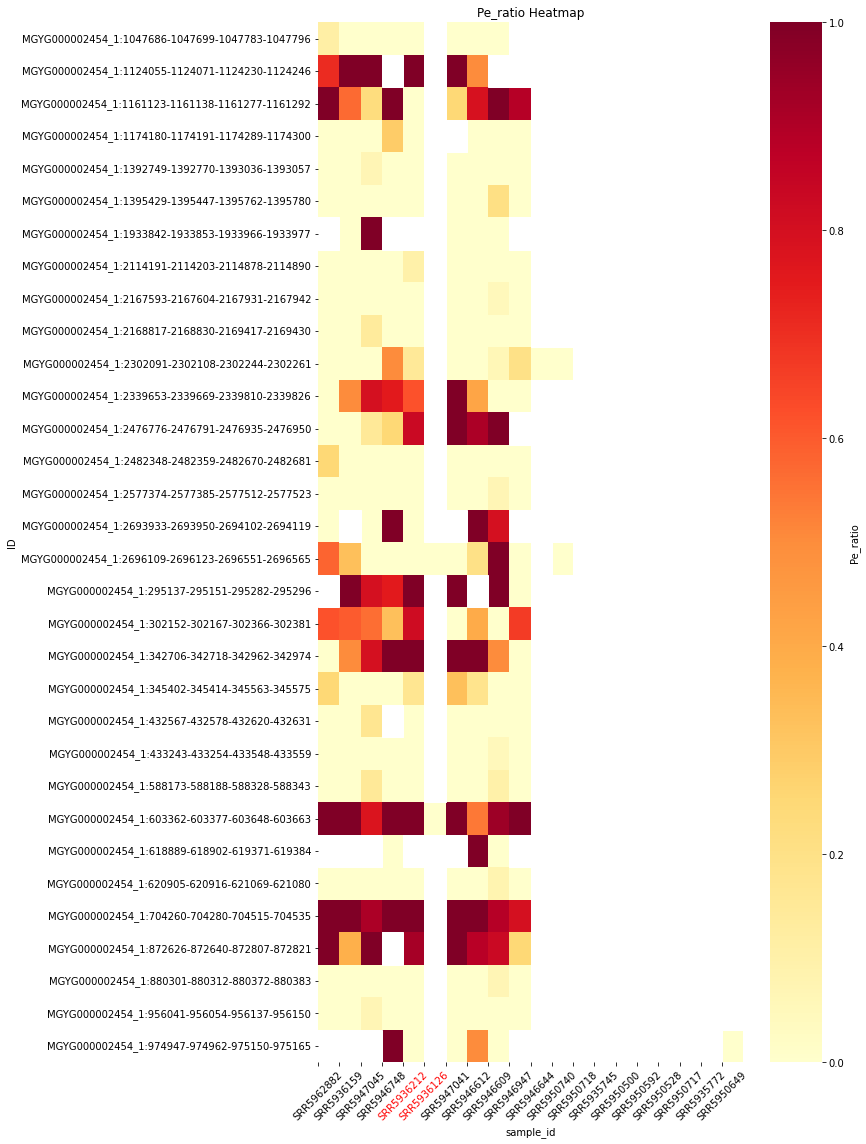

In [232]:
#white ones means missing data for the cell, it means there was no Pe_ratio value for the ID in that sample
#remove the ones has no change: remove all 1 or all 0
# Make a copy to avoid SettingWithCopyWarning
df_plot = df_plot.copy()

# Pivot the DataFrame to have IDs as rows, sample_id as columns
heatmap_data = df_plot.pivot(index='ID', columns='sample_id', values='Pe_ratio')

# Filter sample_order to only include columns that exist
sample_order_existing = [s for s in sample_order if s in heatmap_data.columns]

heatmap_data = heatmap_data[sample_order_existing]

# Remove IDs where all non-NaN values are 0 or all non-NaN values are 1
heatmap_data = heatmap_data[~(
    ((heatmap_data.fillna(0) == 0) | (heatmap_data.isna())).all(axis=1) |
    ((heatmap_data.fillna(1) == 1) | (heatmap_data.isna())).all(axis=1)
)]
# Plot heatmap
plt.figure(figsize=(12, 16))
sns.heatmap(heatmap_data, 
            annot=False, 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Pe_ratio'}
            )

# Optionally, overlay white squares on the positions that were originally NaN
mask = heatmap_data.isna()
for y, x in zip(*np.where(mask)):
    plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color='white', edgecolor='white'))

# Set x-axis labels and color the antibiotic samples
ax = plt.gca()
ax.set_xticks(range(len(sample_order_existing)))
ax.set_xticklabels(sample_order_existing, rotation=45)

for tick_label in ax.get_xticklabels():
    if tick_label.get_text() in antibiotic_samples:
        tick_label.set_color('red')  # color antibiotic samples red
    else:
        tick_label.set_color('black')
        
plt.ylabel('ID')
plt.title('Pe_ratio Heatmap')
plt.xticks(rotation=45, ha ='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_6515/220740649.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color='white', edgecolor='white'))


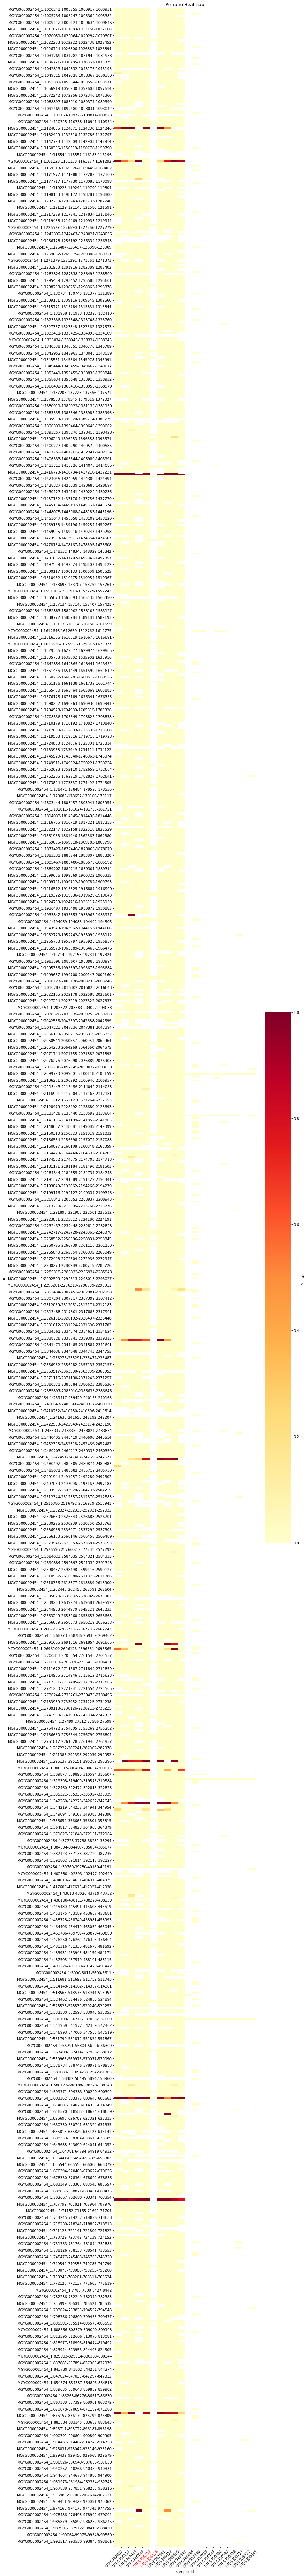

In [233]:
#white ones means missing data for the cell, it means there was no Pe_ratio value for the ID in that sample
# Make a copy to avoid SettingWithCopyWarning
df_plot = df_plot.copy()

# Pivot the DataFrame to have IDs as rows, sample_id as columns
heatmap_data = df_plot.pivot(index='ID', columns='sample_id', values='Pe_ratio')

# Filter sample_order to only include columns that exist
sample_order_existing = [s for s in sample_order if s in heatmap_data.columns]

heatmap_data = heatmap_data[sample_order_existing]

# Plot heatmap
plt.figure(figsize=(12, 100))
sns.heatmap(heatmap_data, 
            annot=False, 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Pe_ratio'}
            )

# Optionally, overlay white squares on the positions that were originally NaN
mask = heatmap_data.isna()
for y, x in zip(*np.where(mask)):
    plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color='white', edgecolor='white'))

# Set x-axis labels and color the antibiotic samples
ax = plt.gca()
ax.set_xticks(range(len(sample_order_existing)))
ax.set_xticklabels(sample_order_existing, rotation=45)

for tick_label in ax.get_xticklabels():
    if tick_label.get_text() in antibiotic_samples:
        tick_label.set_color('red')  # color antibiotic samples red
    else:
        tick_label.set_color('black')
        
plt.ylabel('ID')
plt.title('Pe_ratio Heatmap')
plt.xticks(rotation=45, ha ='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [236]:
#MGYG000002452
species_to_plot = 'MGYG000002452' #Akkermansia muciniphila_C
df_plot = phase_df[phase_df['species_id']==species_to_plot]
df_plot.shape

(225, 10)

In [246]:
#mapping issue: three Akkermansia muciniphila strains in the ref
#MGYG000002452 Akkermansia muciniphila_C
#MGYG000002453 Akkermansia muciniphila_B
#MGYG000002454 Akkermansia muciniphila

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_6515/1865369159.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color='white', edgecolor='white'))


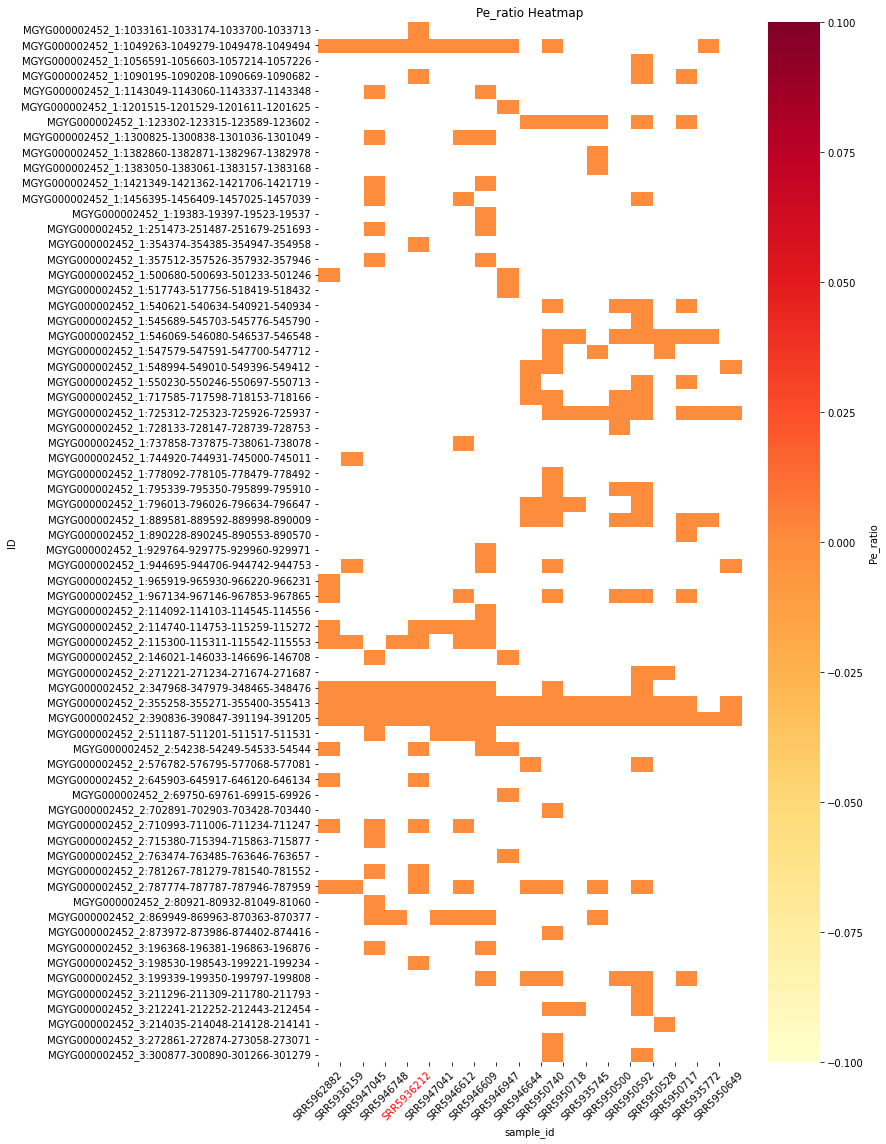

In [245]:
#white ones means missing data for the cell, it means there was no Pe_ratio value for the ID in that sample
# Make a copy to avoid SettingWithCopyWarning
df_plot = df_plot.copy()

# Pivot the DataFrame to have IDs as rows, sample_id as columns
heatmap_data = df_plot.pivot(index='ID', columns='sample_id', values='Pe_ratio')

# Filter sample_order to only include columns that exist
sample_order_existing = [s for s in sample_order if s in heatmap_data.columns]

heatmap_data = heatmap_data[sample_order_existing]

# Plot heatmap
plt.figure(figsize=(12, 16))
sns.heatmap(heatmap_data, 
            annot=False, 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Pe_ratio'}
            )

# Optionally, overlay white squares on the positions that were originally NaN
mask = heatmap_data.isna()
for y, x in zip(*np.where(mask)):
    plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color='white', edgecolor='white'))

# Set x-axis labels and color the antibiotic samples
ax = plt.gca()
ax.set_xticks(range(len(sample_order_existing)))
ax.set_xticklabels(sample_order_existing, rotation=45)

for tick_label in ax.get_xticklabels():
    if tick_label.get_text() in antibiotic_samples:
        tick_label.set_color('red')  # color antibiotic samples red
    else:
        tick_label.set_color('black')
        
plt.ylabel('ID')
plt.title('Pe_ratio Heatmap')
plt.xticks(rotation=45, ha ='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [248]:
#MGYG000002453
species_to_plot = 'MGYG000002453' #Akkermansia muciniphila_B
df_plot = phase_df[phase_df['species_id']==species_to_plot]
df_plot.shape

(291, 10)

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_6515/1865369159.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color='white', edgecolor='white'))


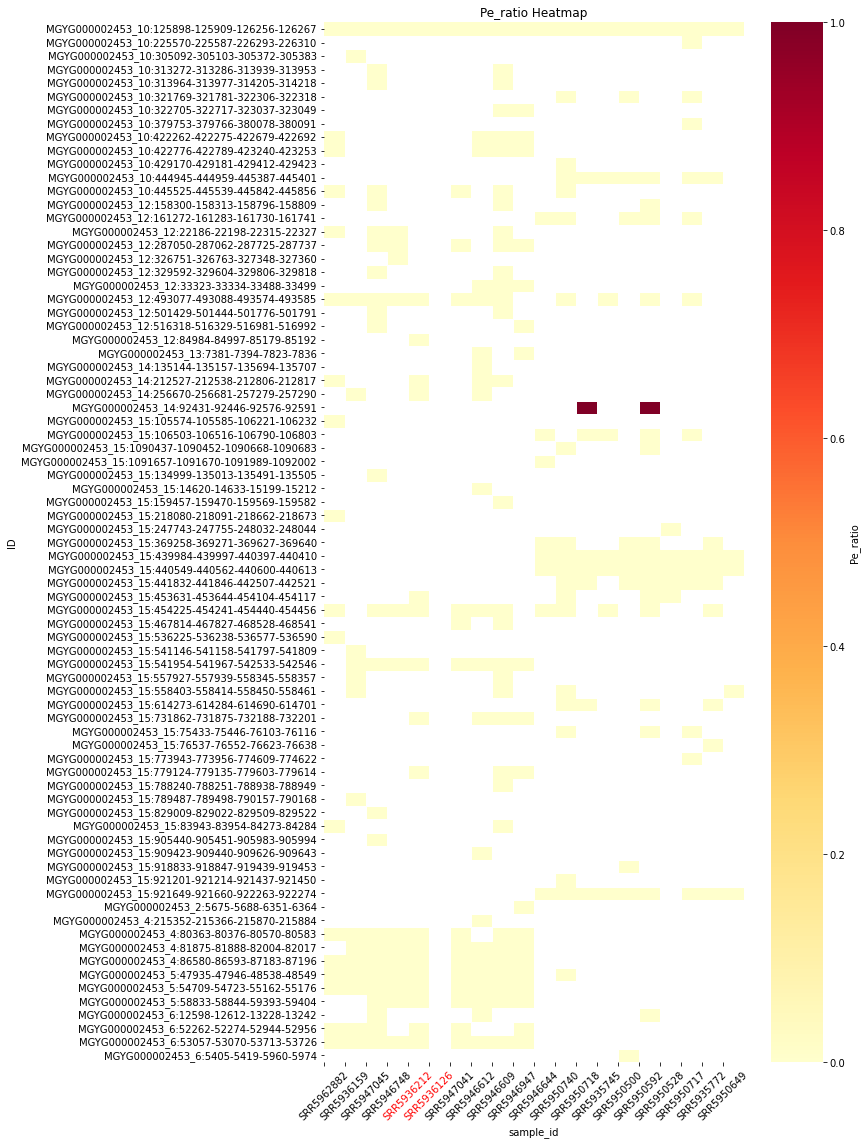

In [251]:
#white ones means missing data for the cell, it means there was no Pe_ratio value for the ID in that sample
# Make a copy to avoid SettingWithCopyWarning
df_plot = df_plot.copy()

# Pivot the DataFrame to have IDs as rows, sample_id as columns
heatmap_data = df_plot.pivot(index='ID', columns='sample_id', values='Pe_ratio')

# Filter sample_order to only include columns that exist
sample_order_existing = [s for s in sample_order if s in heatmap_data.columns]

heatmap_data = heatmap_data[sample_order_existing]

# Plot heatmap
plt.figure(figsize=(12, 16))
sns.heatmap(heatmap_data, 
            annot=False, 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Pe_ratio'}
            )

# Optionally, overlay white squares on the positions that were originally NaN
mask = heatmap_data.isna()
for y, x in zip(*np.where(mask)):
    plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color='white', edgecolor='white'))

# Set x-axis labels and color the antibiotic samples
ax = plt.gca()
ax.set_xticks(range(len(sample_order_existing)))
ax.set_xticklabels(sample_order_existing, rotation=45)

for tick_label in ax.get_xticklabels():
    if tick_label.get_text() in antibiotic_samples:
        tick_label.set_color('red')  # color antibiotic samples red
    else:
        tick_label.set_color('black')
        
plt.ylabel('ID')
plt.title('Pe_ratio Heatmap')
plt.xticks(rotation=45, ha ='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [253]:
#inverton ids (Format:Scaffold:posA-posB-posC-posD) 
#are genome-location specific, collapse strain-specific to species-specific
#functional mapping between invertons across strains

In [167]:
sample_order = [
    "SRR5962882",
    "SRR5936159",
    "SRR5947045",
    "SRR5946748",
    "SRR5936212", #antibio
    "SRR5936126", #antibio
    "SRR5947041",
    "SRR5946612",
    "SRR5946609",
    "SRR5946947",
    "SRR5946644",
    "SRR5950740",
    "SRR5950718",
    "SRR5935745",
    "SRR5950500",
    "SRR5950592",
    "SRR5950528",
    "SRR5950717",
    "SRR5935772",
    "SRR5950649",
    "SRR5950729",
    "SRR5946857"
]

In [66]:
#use the first sample as the ref
# Pivot to matrix: rows = inverton ID, columns = sample_id
heatmap_data = df_filtered.pivot_table(index='ID', columns='sample_id', values='Pe_ratio')

In [69]:
base_sample = 'SRR5962882'

# Ensure the base exists
if base_sample not in heatmap_data.columns:
    raise ValueError(f"{base_sample} not found in data!")

# Subtract the base sample from all columns
diff_data = heatmap_data.subtract(heatmap_data[base_sample], axis=0)

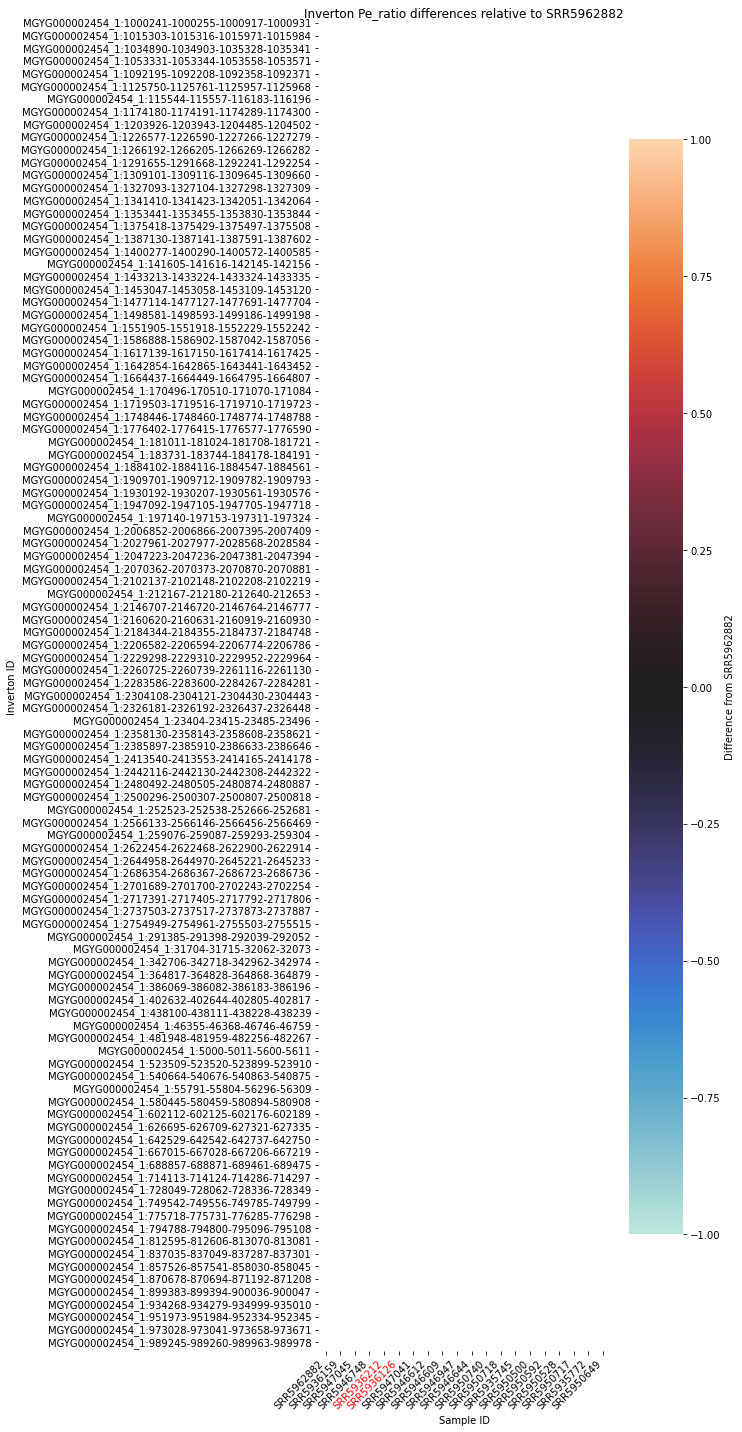

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

plt.figure(figsize=(10, 20))
# Keep only samples present in diff_data and maintain order
valid_samples = [s for s in sample_order if s in diff_data.columns]

# Reorder columns
diff_data = diff_data[valid_samples]
mask = diff_data == 0
# Highlight small deviations around 0
norm = TwoSlopeNorm(vmin=diff_data.min().min(),
                    vcenter=0,
                    vmax=diff_data.max().max())

sns.heatmap(
    diff_data,
    cmap='icefire',
    norm=norm,
    mask=mask,
    linewidths=0.5,
    cbar_kws={'label': f'Difference from {base_sample}'}
)

# Highlight antibiotic samples if present
antibiotic_samples = ["SRR5936212", "SRR5936126"]
ax = plt.gca()
for label in ax.get_xticklabels():
    if label.get_text() in antibiotic_samples:
        label.set_color('red')
    else:
        label.set_color('black')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Sample ID')
plt.ylabel('Inverton ID')
plt.title(f'Inverton Pe_ratio differences relative to {base_sample}')
plt.tight_layout()
plt.show()


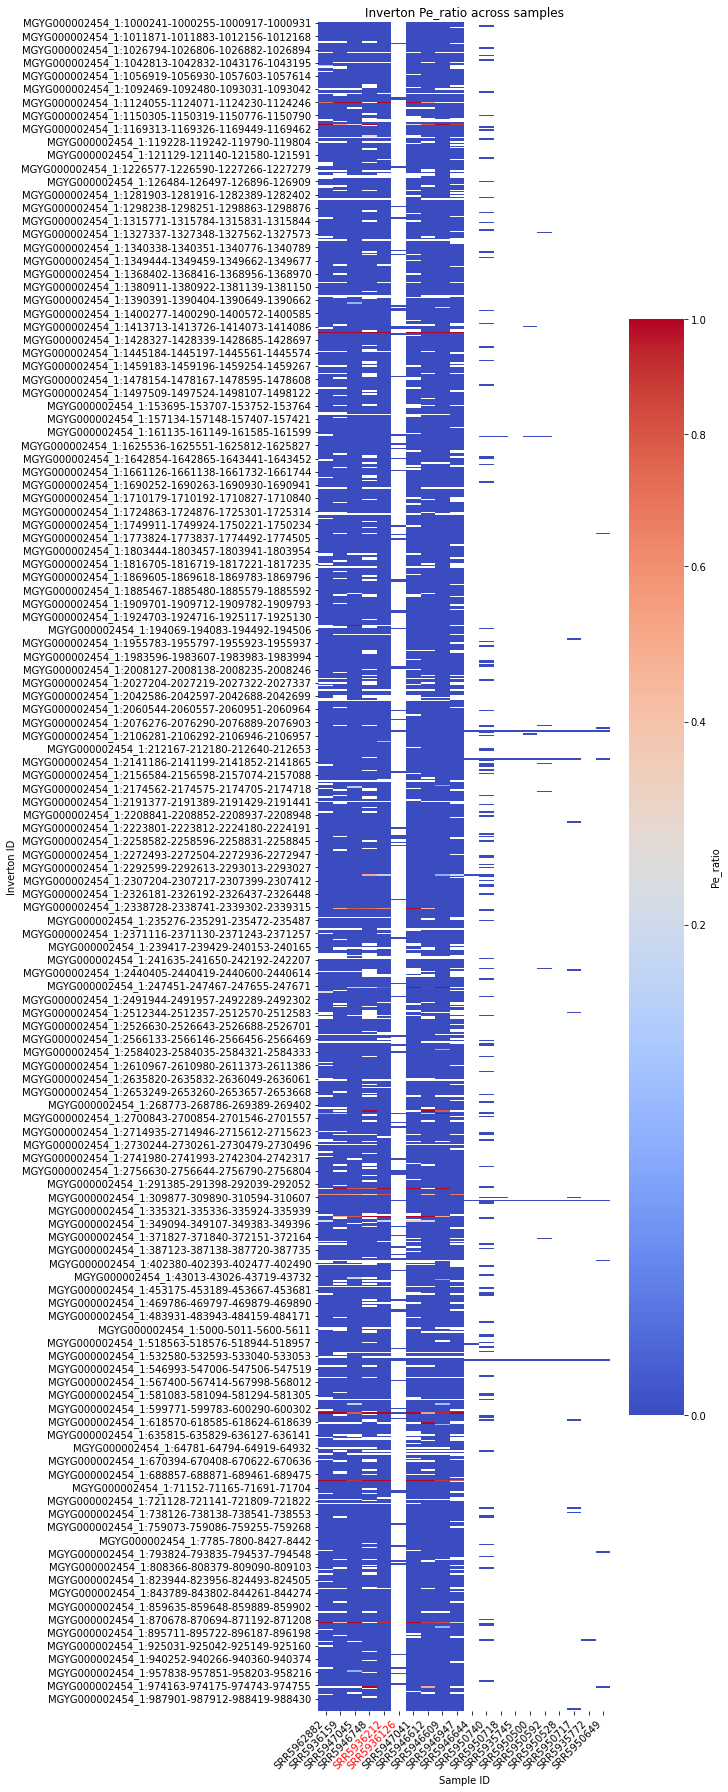

In [53]:
# Pivot to a matrix: rows = inverton ID, columns = sample_id
species_to_plot = 'MGYG000002454'
df_plot = phase_df[phase_df['species_id']==species_to_plot]
# Pivot to Pe_ratio matrix
df_plot = df_plot.dropna(subset=['Pe_ratio'])
heatmap_data = df_plot.pivot_table(index='ID', columns='sample_id', values='Pe_ratio')

# Keep only samples that exist in both sample_order and the pivot columns
valid_samples = [s for s in sample_order if s in heatmap_data.columns]

# Subset safely
heatmap_data = heatmap_data[valid_samples]

plt.figure(figsize=(10, 25))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',            # or 'coolwarm', 'balance'
    norm=PowerNorm(gamma=0.5), # < 1 brightens low values, emphasizes midrange
    center=0.5,
    vmin=0, vmax=1,
    cbar_kws={'label': 'Pe_ratio'}
)
# Highlight antibiotic samples that are present
antibiotic_samples = ["SRR5936212", "SRR5936126"]
ax = plt.gca()
ax.set_xlabel('Sample ID')
ax.set_ylabel('Inverton ID')
plt.title('Inverton Pe_ratio across samples')

for label in ax.get_xticklabels():
    if label.get_text() in antibiotic_samples:
        label.set_color('red')
    else:
        label.set_color('black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_68148/1132596378.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Present'] = (~df_plot['Pe_ratio'].isna()).astype(int)


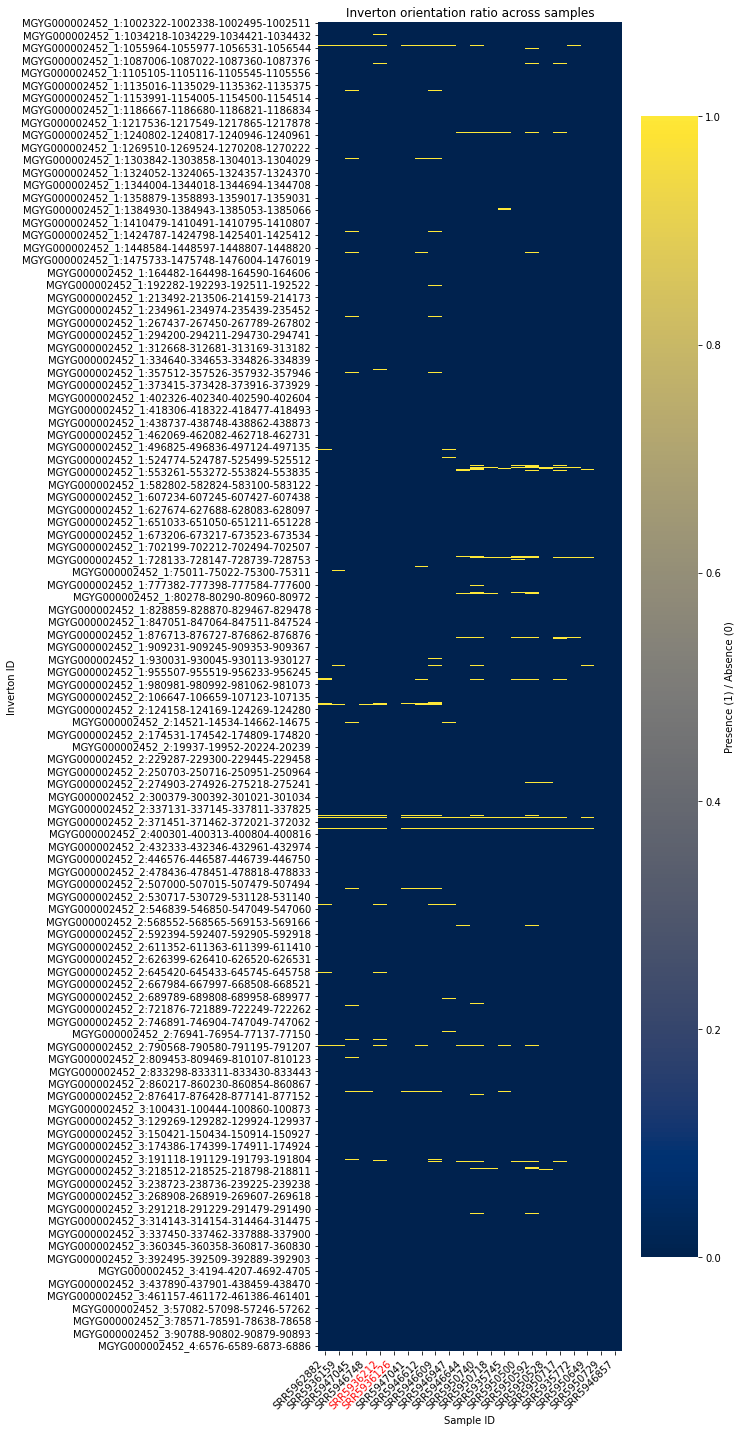

In [14]:
# Create a simple presence/absence indicator
df_plot['Present'] = (~df_plot['Pe_ratio'].isna()).astype(int)

# Pivot to a matrix: rows = inverton ID, columns = sample_id
heatmap_data = df_plot.pivot_table(index='ID', columns='sample_id', values='Present', fill_value=0)[sample_order]

plt.figure(figsize=(10, 20))
sns.heatmap(heatmap_data, cmap='cividis', cbar_kws={'label': 'Presence (1) / Absence (0)'})

# Highlight two antibiotic samples
antibiotic_samples = ["SRR5936212", "SRR5936126"]
ax = plt.gca()
ax.set_xlabel('Sample ID')
ax.set_ylabel('Inverton ID')
plt.title('Inverton orientation ratio across samples')

for label in ax.get_xticklabels():
    if label.get_text() in antibiotic_samples:
        label.set_color('red')   # antibiotic samples in red
    else:
        label.set_color('black') # others in black

plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()


/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_68148/3123422544.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Present'] = (~df_plot['Pe_ratio'].isna()).astype(int)


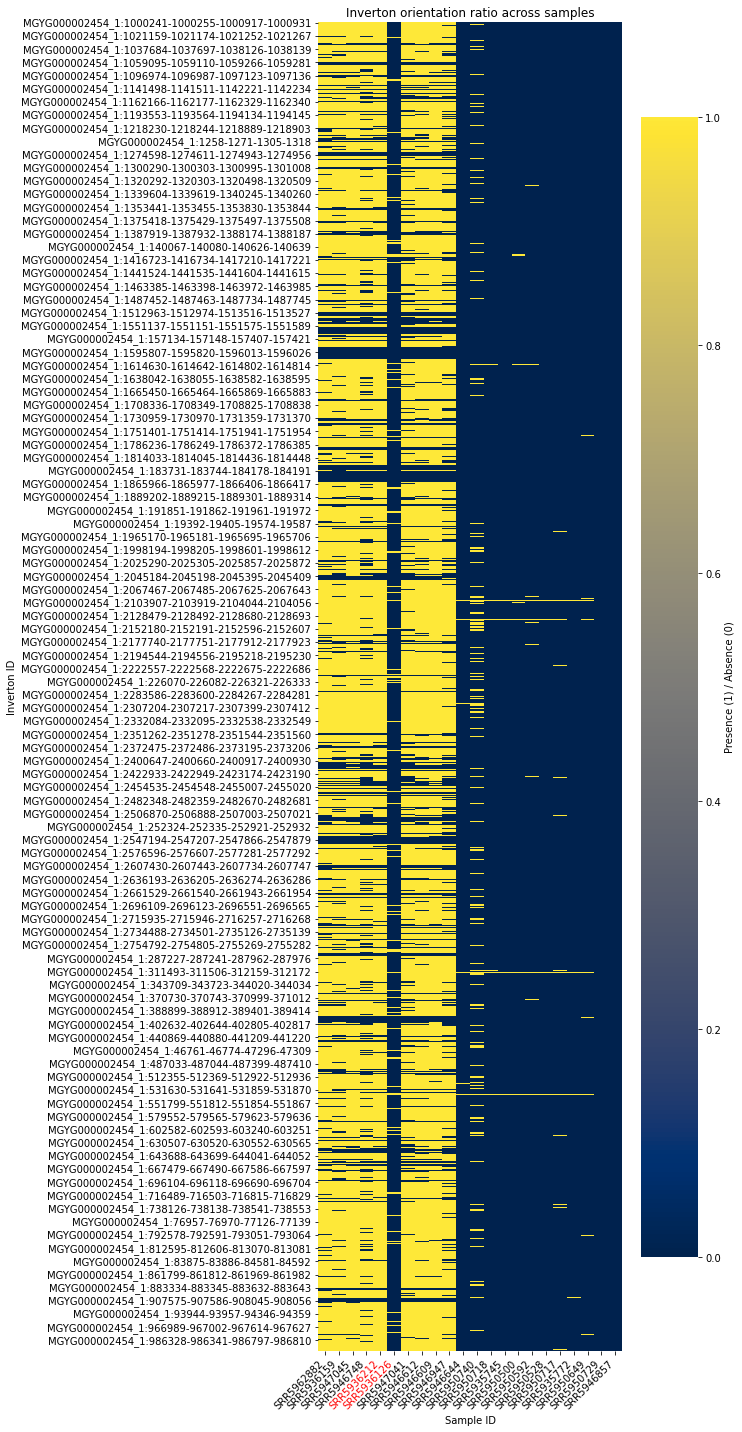

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

species_to_plot = 'MGYG000002454'
df_plot = phase_df[phase_df['species_id']==species_to_plot]

# Create a simple presence/absence indicator
df_plot['Present'] = (~df_plot['Pe_ratio'].isna()).astype(int)

# Pivot to a matrix: rows = inverton ID, columns = sample_id
heatmap_data = df_plot.pivot_table(index='ID', columns='sample_id', values='Present', fill_value=0)[sample_order]

plt.figure(figsize=(10, 20))
sns.heatmap(heatmap_data, cmap='cividis', cbar_kws={'label': 'Presence (1) / Absence (0)'})

# Highlight two antibiotic samples
antibiotic_samples = ["SRR5936212", "SRR5936126"]  # replace with your actual antibiotic sample IDs

ax = plt.gca()
ax.set_xlabel('Sample ID')
ax.set_ylabel('Inverton ID')
plt.title('Inverton orientation ratio across samples')


for label in ax.get_xticklabels():
    if label.get_text() in antibiotic_samples:
        label.set_color('red')   # antibiotic samples in red
    else:
        label.set_color('black') # others in black

plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()
